In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_5xfad = pd.read_csv('../results/Brain5xFAD_OzON_Truth_Results_14Jan2024.csv')
df_wt = pd.read_csv('../results/BrainWT_OzON_Truth_Results_14Jan2024.csv')
df_liver  = pd.read_csv('../results/Liver_OzON_Truth_Results_16Jan2024.csv')

df_5xfad
df_wt
# df_liver

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Match_Group,Cage,Mouse,...,FAC,TG,Group,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,Area,Area_DDT,Area_DDT_Ratio,SLBG_group
0,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,26428.0,1232,FAD185,FAD185_M4,...,FA16:1,TG(52:5),47,26428.0,12.015183,0.015183,2988.0,2903.0,0.09,9
1,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-9,760.7,599.5,12.07,2939.0,732,FAD185,FAD185_M4,...,FA16:1,TG(52:5),52,2939.0,12.067500,0.067500,287.0,271.0,0.09,9
2,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,1126.0,1221,DOD94,DOD94_F3,...,FA16:1,TG(52:5),48,1126.0,12.015200,0.015200,84.0,59.0,0.00,7
3,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,3221.0,1225,FAD184,FAD184_F3,...,FA16:1,TG(52:5),49,3221.0,12.015450,0.015450,279.0,273.0,0.00,8
4,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,16896.0,1233,FAD185,FAD185_M4,...,FA16:1,TG(52:5),50,16896.0,12.015200,0.015200,1701.0,1677.0,0.15,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,"[TG(57:11),TG(56:4)]_FA18:1",11282023_FAD185_M4_WT_cortex_O3on_01,n-9,818.7,629.5,15.65,472.0,1813,FAD185,FAD185_M4,...,FA18:1,"TG(56:4), TG(57:11)",443,472.0,15.647717,0.162283,64.0,58.0,NaN,92
140,"[TG(57:12),TG(56:5)]_FA18:1",11282023_FAD184_F3_WT_cereb_O3on_01,n-9,816.7,627.5,14.76,419.0,1764,FAD184,FAD184_F3,...,FA18:1,"TG(56:5), TG(57:12)",456,419.0,14.760150,0.069850,49.0,16.0,NaN,93
141,"[TG(57:9),TG(56:2)]_FA18:1",11282023_FAD184_F3_WT_cereb_O3on_01,n-9,822.8,633.6,17.91,436.0,1884,FAD184,FAD184_F3,...,FA18:1,"TG(56:2), TG(57:9)",469,436.0,17.911017,0.028983,77.0,43.0,NaN,95
142,"[TG(57:9),TG(56:2)]_FA18:1",11282023_DOD94_F3_WT_cortex_O3on_01,n-9,822.8,633.6,17.91,679.0,1881,DOD94,DOD94_F3,...,FA18:1,"TG(56:2), TG(57:9)",470,679.0,17.911000,0.029000,90.0,84.0,NaN,94


# Liver

23


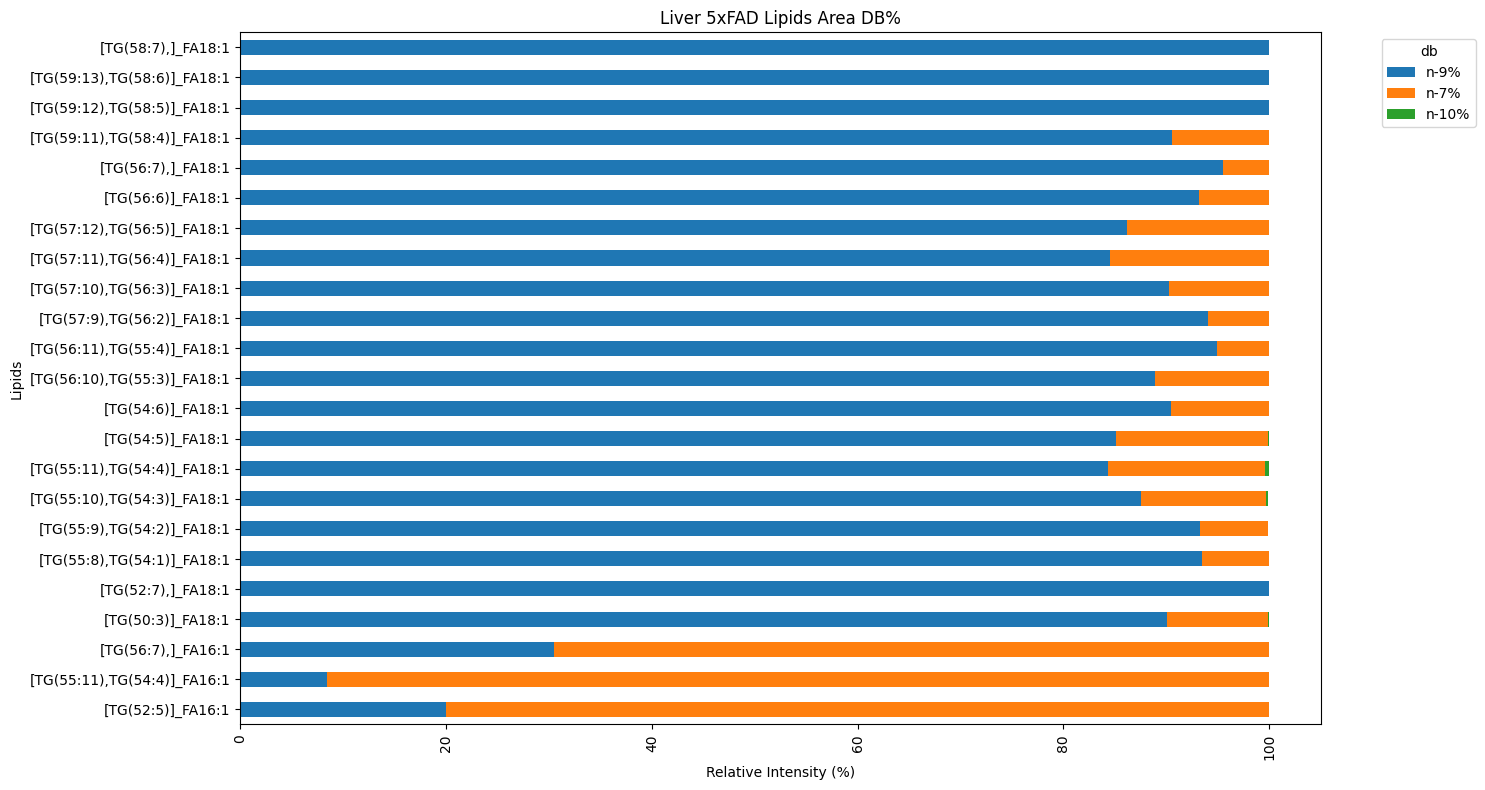

In [27]:
# Creating the columns n-7, n-9, n-10, and n-12 in df_liver
df_liver['n-7'] = 0.0
df_liver['n-9'] = 0.0
df_liver['n-10'] = 0.0
df_liver['n-12'] = 0.0

# Filling the columns based on db_pos and corresponding OzESI intensity
for index, row in df_liver.iterrows():
    db_pos = row['db']
    oz_intensity = row['Area_DDT']
    if db_pos in ['n-7', 'n-9', 'n-10', 'n-12']:
        df_liver.at[index, db_pos] = oz_intensity
df_liver

#print unqiue lipids
df_liver['Lipid'].unique()

# Grouping by 'Lipid' and summing up the n-7, n-9, n-10, and n-12 columns
df_liver2 = df_liver.groupby('Lipid')[['n-7', 'n-9', 'n-10', 'n-12']].sum().round(0).reset_index()
#Creating a new column 'Total Intensity' in df_liver2
df_liver2['Total_Intensity'] = df_liver2[['n-7', 'n-9', 'n-10', 'n-12']].sum(axis=1)

# Create the 'FA' column
df_liver2['FA'] = df_liver2['Lipid'].apply(lambda x: '16' if 'FA16:1' in x else ('18' if 'FA18:1' in x else 'Other'))

# Sort the DataFrame by the 'FA' column
df_liver2.sort_values(by='FA', inplace=True)
# Displaying df4
df_liver2

# Creating a new dataframe df_liver3 from df_liver2
df_liver3 = df_liver2.copy()

# Calculating the relative intensity of each db_pos for each lipid
for col in ['n-7', 'n-9', 'n-10', 'n-12']:
    df_liver3[col + '%'] = ((df_liver3[col] / df_liver3['Total_Intensity']) * 100).round(1)


# Function to determine the value for the FAC column
def determine_fac(lipid):
    if 'FA18:1' in lipid:
        return 'FA18:1'
    elif 'FA16:1' in lipid:
        return 'FA16:1'
    else:
        return None  # or some other default value

# Apply the function to the Lipid column to create the FAC column
df_liver3['FAC'] = df_liver3['Lipid'].apply(determine_fac)

import pandas as pd
import re

# Function to extract TG values
def extract_tg(lipid):
    # Regular expression pattern to match TG(##:#) or similar patterns
    pattern = r'TG\(\d+:\d+\)'
    matches = re.findall(pattern, lipid)
    return ', '.join(matches) if matches else None

# Apply the function to the Lipid column to create the TG column
df_liver3['TG'] = df_liver3['Lipid'].apply(extract_tg)




# Function to sort TG values within a cell
def sort_tg_values(tg_cell):
    if not pd.isna(tg_cell) and ', ' in tg_cell:
        tg_list = tg_cell.split(', ')
        tg_list_sorted = sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')])
        return ', '.join(tg_list_sorted)
    else:
        return tg_cell

# Apply the function to the TG column
df_liver3['TG'] = df_liver3['TG'].apply(sort_tg_values)
df_liver3 = df_liver3.sort_values(by=['FAC', 'TG'])
import pandas as pd
import re

# Function to remove TG(##:0) patterns from the Lipid string
def remove_tg_zero(lipid):
    # Pattern to match TG(##:0)
    pattern = r'TG\(\d+:0\)'
    # Remove TG(##:0) patterns
    new_lipid = re.sub(pattern, '', lipid)
    # Remove any extra commas and spaces left after removal
    new_lipid = re.sub(r',\s+', ', ', new_lipid).strip(', ')
    return new_lipid

# Apply the function to the Lipid column
df_liver3['Lipid'] = df_liver3['Lipid'].apply(remove_tg_zero)

# Continue with the rest of your code for sorting
# ... [rest of your code] ...

# Displaying df_l


# Displaying df_liver3 with the new relative intensity columns
df_liver3


# Reshaping the DataFrame
reshaped_df = df_liver3.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db', value_name='Percentage')


reshaped_df = reshaped_df[~reshaped_df['Lipid'].str.contains('FA18:2')]

reshaped_df


# Creating a pivot table
pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db', values='Percentage', aggfunc='sum')


# Function to generate a combined sorting key
def combined_sort_key(lipid):
    # Check if lipid contains 'FA16:1'
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

    # Extract and sort TG values
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

    # Combine the keys
    return fa16_1_key + tg_list_sorted + lipid

# Apply the combined sorting function to the Lipid index to create a sorting key
pivot_df['Combined_Sort_Key'] = pivot_df.index.to_series().apply(combined_sort_key)

# Sort the DataFrame by the combined sorting key
pivot_df = pivot_df.sort_values(by='Combined_Sort_Key')

# Drop the combined sorting key column
pivot_df.drop('Combined_Sort_Key', axis=1, inplace=True)

# Reordering the columns to make n-9% appear first
column_order = ['n-9%', 'n-7%', 'n-10%']
# column_order = ['n-9%', 'n-7%', 'n-10%']
pivot_df = pivot_df[column_order]
#delete FA18:2

pivot_df
# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
pivot_df.plot(kind='barh', stacked=True, ax=ax)

ax.set_xlabel('Relative Intensity (%)')
ax.set_ylabel('Lipids')
ax.set_title('Liver 5xFAD Lipids Area DB%')
plt.xticks(rotation=90)

# Moving the legend outside of the plot
ax.legend(title='db', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.savefig('Projects/FaceFats/plots/Barstack_area/Liver_5xFAD_Area_Truth_16Jan24.png', dpi=300, bbox_inches='tight')
# #save as pdf
# plt.savefig('Projects/FaceFats/plots/Barstack_area/Liver_5xFAD_Area_Truth_16Jan24.pdf', dpi=300, bbox_inches='tight')


print(len(pivot_df))
plt.tight_layout()
plt.show()


# 5xFAD

In [2]:
# use d_load or dload

# # Filtering for 5xFAD Genotype
df_5xFAD = df_5xfad[df_5xfad['Genotype'] == '5xFAD']
# df_5xFAD = d_load[d_load['Genotype'] == '5xFAD']

# Step 1: Filter for non-liver samples and rename to df_brain_5xFAD
df_brain_5xFAD = df_5xFAD[df_5xFAD['Biology'] != 'liver']

# Step 1: Filter for non-liver samples and rename to df_brain_5xFAD
df_brain_5xFAD = df_5xFAD[df_5xFAD['Biology'] != 'liver']
df_brain_5xFAD_cereb = df_brain_5xFAD[df_brain_5xFAD['Biology'] == 'cereb']
df_brain_5xFAD_cortex = df_brain_5xFAD[df_brain_5xFAD['Biology'] == 'cortex']
df_brain_5xFAD_hippo = df_brain_5xFAD[df_brain_5xFAD['Biology'] == 'hippo']
df_brain_5xFAD_dienc = df_brain_5xFAD[df_brain_5xFAD['Biology'] == 'dienc']

def process_n_percent(df):
    # Create and fill n-7, n-9, n-10, n-12 columns
    for col in ['n-7', 'n-9', 'n-10', 'n-12']:
        df[col] = df.apply(lambda x: x['Area'] if x['db'] == col else 0, axis=1)

    # Group by 'Lipid' and sum up the n columns
    df_grouped = df.groupby('Lipid')[['n-7', 'n-9', 'n-10', 'n-12']].sum().round(0).reset_index()

    # Calculate total intensity
    df_grouped['Total_Intensity'] = df_grouped[['n-7', 'n-9', 'n-10', 'n-12']].sum(axis=1)

    # Calculate relative intensities
    for col in ['n-7', 'n-9', 'n-10', 'n-12']:
        df_grouped[col + '%'] = ((df_grouped[col] / df_grouped['Total_Intensity']) * 100).round(1)

    # Return the new dataframe
    return df_grouped

#Example usage:
df_brain_5xFAD2 = process_n_percent(df_brain_5xFAD)
df_brain_5xFAD_cereb2 = process_n_percent(df_brain_5xFAD_cereb)
df_brain_5xFAD_cortex2 = process_n_percent(df_brain_5xFAD_cortex)
df_brain_5xFAD_hippo2 = process_n_percent(df_brain_5xFAD_hippo)
df_brain_5xFAD_dienc2 = process_n_percent(df_brain_5xFAD_dienc)



# Display the final DataFrame df_brain_5xFAD2
df_brain_5xFAD2
df_brain_5xFAD_cereb2
df_brain_5xFAD_cortex2
df_brain_5xFAD_hippo2
df_brain_5xFAD_dienc2


/tmp/ipykernel_119793/3857742131.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df.apply(lambda x: x['Area'] if x['db'] == col else 0, axis=1)


,Lipid,n-7,n-9,n-10,n-12,Total_Intensity,n-7%,n-9%,n-10%,n-12%
0,[TG(50:3)]_FA18:1,0.0,347.0,0.0,0,347.0,0.0,100.0,0.0,0.0
1,[TG(52:5)]_FA16:1,1439.0,81.0,0.0,0,1520.0,94.7,5.3,0.0,0.0
2,[TG(54:5)]_FA18:1,391.0,3491.0,0.0,0,3882.0,10.1,89.9,0.0,0.0
3,[TG(54:6)]_FA18:1,0.0,145.0,0.0,0,145.0,0.0,100.0,0.0,0.0
4,"[TG(55:10),TG(54:3)]_FA18:1",917.0,17911.0,56.0,0,18884.0,4.9,94.8,0.3,0.0
5,"[TG(55:11),TG(54:4)]_FA16:1",179.0,0.0,0.0,0,179.0,100.0,0.0,0.0,0.0
6,"[TG(55:11),TG(54:4)]_FA18:1",1035.0,12877.0,0.0,0,13912.0,7.4,92.6,0.0,0.0
7,"[TG(55:8),TG(54:1)]_FA18:1",0.0,149.0,0.0,0,149.0,0.0,100.0,0.0,0.0
8,"[TG(55:9),TG(54:2)]_FA18:1",323.0,3097.0,56.0,0,3476.0,9.3,89.1,1.6,0.0
9,"[TG(56:7),]_FA18:1",58.0,61.0,0.0,0,119.0,48.7,51.3,0.0,0.0


In [3]:
# Grouping by 'Lipid' and summing up the n-7, n-9, n-10, and n-12 columns
df_brain_5xFAD2 = df_brain_5xFAD.groupby('Lipid')[['n-7', 'n-9', 'n-10', 'n-12']].sum().round(0).reset_index()
#Creating a new column 'Total Intensity' in df_brain_5xFAD2
df_brain_5xFAD2['Total_Intensity'] = df_brain_5xFAD2[['n-7', 'n-9', 'n-10', 'n-12']].sum(axis=1)

# Create the 'FA' column
df_brain_5xFAD2['FA'] = df_brain_5xFAD2['Lipid'].apply(lambda x: '16' if 'FA16:1' in x else ('18' if 'FA18:1' in x else 'Other'))

# Sort the DataFrame by the 'FA' column
df_brain_5xFAD2.sort_values(by='FA', inplace=True)
# Displaying df4
df_brain_5xFAD2

,Lipid,n-7,n-9,n-10,n-12,Total_Intensity,FA
1,[TG(52:5)]_FA16:1,12445.0,850.0,0.0,0,13295.0,16
5,"[TG(55:11),TG(54:4)]_FA16:1",179.0,0.0,0.0,0,179.0,16
0,[TG(50:3)]_FA18:1,162.0,3607.0,0.0,0,3769.0,18
2,[TG(54:5)]_FA18:1,1802.0,20825.0,0.0,0,22627.0,18
3,[TG(54:6)]_FA18:1,62.0,1323.0,0.0,0,1385.0,18
4,"[TG(55:10),TG(54:3)]_FA18:1",3582.0,78943.0,105.0,0,82630.0,18
6,"[TG(55:11),TG(54:4)]_FA18:1",4757.0,55572.0,0.0,0,60329.0,18
7,"[TG(55:8),TG(54:1)]_FA18:1",0.0,308.0,0.0,0,308.0,18
8,"[TG(55:9),TG(54:2)]_FA18:1",723.0,13118.0,56.0,0,13897.0,18
9,"[TG(56:11),TG(55:4)]_FA18:1",0.0,95.0,0.0,0,95.0,18


In [4]:
# Creating a new dataframe df_brain_5xFAD3 from df_liver2
df_brain_5xFAD3 = df_brain_5xFAD2.copy()

# Calculating the relative intensity of each db_pos for each lipid
for col in ['n-7', 'n-9', 'n-10', 'n-12']:
    df_brain_5xFAD3[col + '%'] = ((df_brain_5xFAD3[col] / df_brain_5xFAD3['Total_Intensity']) * 100).round(1)


# Function to determine the value for the FAC column
def determine_fac(lipid):
    if 'FA18:1' in lipid:
        return 'FA18:1'
    elif 'FA16:1' in lipid:
        return 'FA16:1'
    else:
        return None  # or some other default value

# Apply the function to the Lipid column to create the FAC column
df_brain_5xFAD3['FAC'] = df_brain_5xFAD3['Lipid'].apply(determine_fac)

import pandas as pd
import re

# Function to extract TG values
def extract_tg(lipid):
    # Regular expression pattern to match TG(##:#) or similar patterns
    pattern = r'TG\(\d+:\d+\)'
    matches = re.findall(pattern, lipid)
    return ', '.join(matches) if matches else None

# Apply the function to the Lipid column to create the TG column
df_brain_5xFAD3['TG'] = df_brain_5xFAD3['Lipid'].apply(extract_tg)




# Function to sort TG values within a cell
def sort_tg_values(tg_cell):
    if not pd.isna(tg_cell) and ', ' in tg_cell:
        tg_list = tg_cell.split(', ')
        tg_list_sorted = sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')])
        return ', '.join(tg_list_sorted)
    else:
        return tg_cell

# Apply the function to the TG column
df_brain_5xFAD3['TG'] = df_brain_5xFAD3['TG'].apply(sort_tg_values)
df_brain_5xFAD3 = df_brain_5xFAD3.sort_values(by=['FAC', 'TG'])
import pandas as pd
import re

# Function to remove TG(##:0) patterns from the Lipid string
def remove_tg_zero(lipid):
    # Pattern to match TG(##:0)
    pattern = r'TG\(\d+:0\)'
    # Remove TG(##:0) patterns
    new_lipid = re.sub(pattern, '', lipid)
    # Remove any extra commas and spaces left after removal
    new_lipid = re.sub(r',\s+', ', ', new_lipid).strip(', ')
    return new_lipid

# Apply the function to the Lipid column
df_brain_5xFAD3['Lipid'] = df_brain_5xFAD3['Lipid'].apply(remove_tg_zero)

# Continue with the rest of your code for sorting
# ... [rest of your code] ...

# Displaying df_l


# Displaying df_brain_5xFAD3 with the new relative intensity columns
df_brain_5xFAD3


,Lipid,n-7,n-9,n-10,n-12,Total_Intensity,FA,n-7%,n-9%,n-10%,n-12%,FAC,TG
1,[TG(52:5)]_FA16:1,12445.0,850.0,0.0,0,13295.0,16,93.6,6.4,0.0,0.0,FA16:1,TG(52:5)
5,"[TG(55:11),TG(54:4)]_FA16:1",179.0,0.0,0.0,0,179.0,16,100.0,0.0,0.0,0.0,FA16:1,"TG(54:4), TG(55:11)"
0,[TG(50:3)]_FA18:1,162.0,3607.0,0.0,0,3769.0,18,4.3,95.7,0.0,0.0,FA18:1,TG(50:3)
7,"[TG(55:8),TG(54:1)]_FA18:1",0.0,308.0,0.0,0,308.0,18,0.0,100.0,0.0,0.0,FA18:1,"TG(54:1), TG(55:8)"
8,"[TG(55:9),TG(54:2)]_FA18:1",723.0,13118.0,56.0,0,13897.0,18,5.2,94.4,0.4,0.0,FA18:1,"TG(54:2), TG(55:9)"
4,"[TG(55:10),TG(54:3)]_FA18:1",3582.0,78943.0,105.0,0,82630.0,18,4.3,95.5,0.1,0.0,FA18:1,"TG(54:3), TG(55:10)"
6,"[TG(55:11),TG(54:4)]_FA18:1",4757.0,55572.0,0.0,0,60329.0,18,7.9,92.1,0.0,0.0,FA18:1,"TG(54:4), TG(55:11)"
2,[TG(54:5)]_FA18:1,1802.0,20825.0,0.0,0,22627.0,18,8.0,92.0,0.0,0.0,FA18:1,TG(54:5)
3,[TG(54:6)]_FA18:1,62.0,1323.0,0.0,0,1385.0,18,4.5,95.5,0.0,0.0,FA18:1,TG(54:6)
9,"[TG(56:11),TG(55:4)]_FA18:1",0.0,95.0,0.0,0,95.0,18,0.0,100.0,0.0,0.0,FA18:1,"TG(55:4), TG(56:11)"


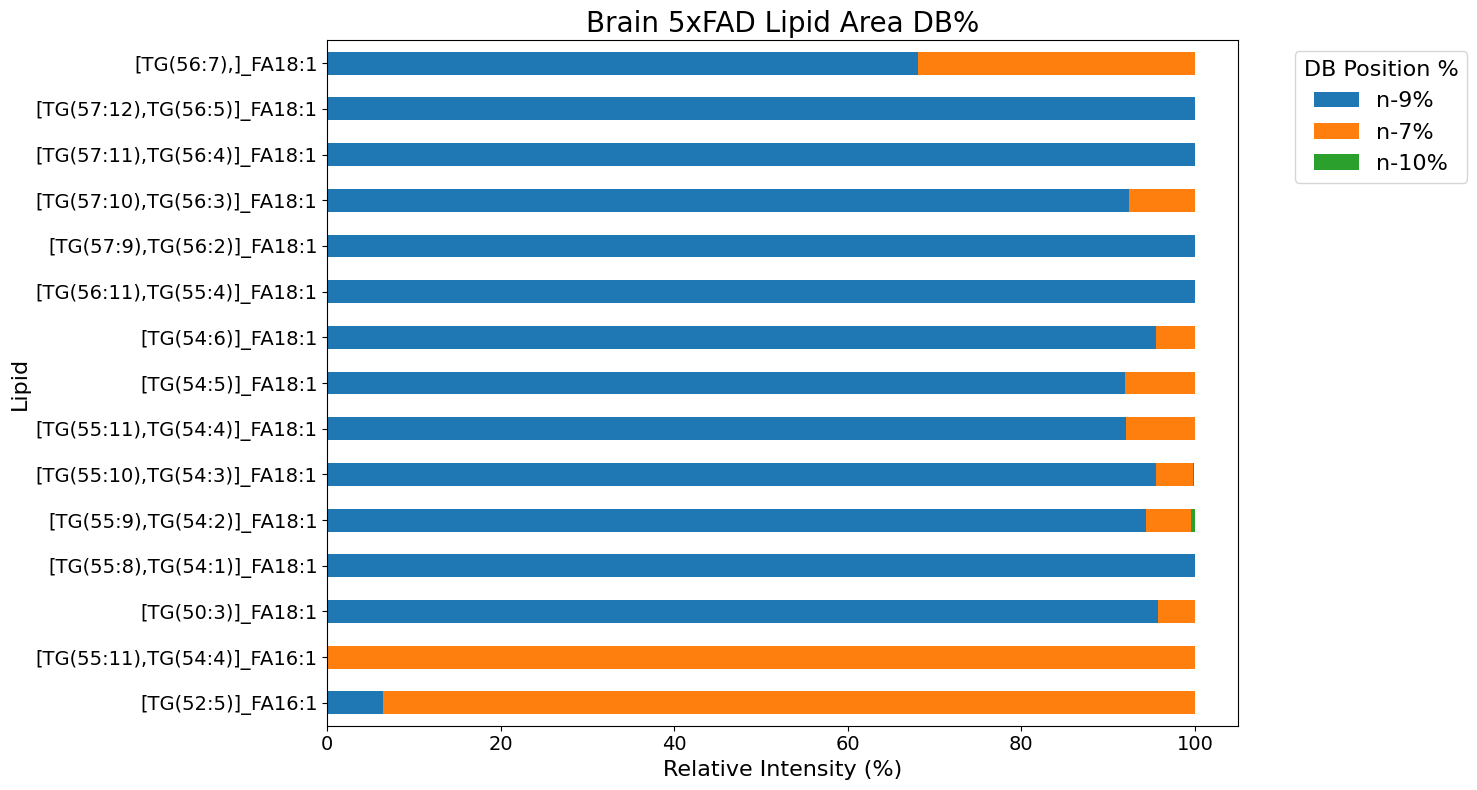

In [5]:
# Reshaping the DataFrame
reshaped_df = df_brain_5xFAD3.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db', value_name='Percentage')


# reshaped_df = reshaped_df[~reshaped_df['Lipid'].str.contains('FA18:2')]

reshaped_df


# Creating a pivot table
pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db', values='Percentage', aggfunc='sum')


# Function to generate a combined sorting key
def combined_sort_key(lipid):
    # Check if lipid contains 'FA16:1'
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

    # Extract and sort TG values
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

    # Combine the keys
    return fa16_1_key + tg_list_sorted + lipid

# Apply the combined sorting function to the Lipid index to create a sorting key
pivot_df['Combined_Sort_Key'] = pivot_df.index.to_series().apply(combined_sort_key)


# Sort the DataFrame by the combined sorting key
pivot_df = pivot_df.sort_values(by='Combined_Sort_Key')

# Drop the combined sorting key column
pivot_df.drop('Combined_Sort_Key', axis=1, inplace=True)

# Reordering the columns to make n-9% appear first
column_order = ['n-9%', 'n-7%', 'n-10%']
# column_order = ['n-9%', 'n-7%', 'n-10%']
pivot_df = pivot_df[column_order]
#delete FA18:2

pivot_df
# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
pivot_df.plot(kind='barh', stacked=True, ax=ax)

ax.set_xlabel('Relative Intensity (%)', fontsize = 16)
ax.set_ylabel('Lipid', fontsize = 16)
ax.set_title('Brain 5xFAD Lipid Area DB%', fontsize = 20)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)

# Moving the legend outside of the plot
ax.legend(title='DB Position %', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 16, title_fontsize = 16)

# # # Saving the plot as a PNG file
# plt.savefig('Projects/FaceFats/plots/Barstack_area/FF_Brain5xFAD_Truth_14Jan24.png', dpi=300, bbox_inches='tight')
# plt.savefig('Projects/FaceFats/plots/Barstack_area/FF_Brain5xFAD_Truth_14Jan24.pdf', dpi=300, bbox_inches='tight')
# # #save as pdf

plt.tight_layout()
plt.show()


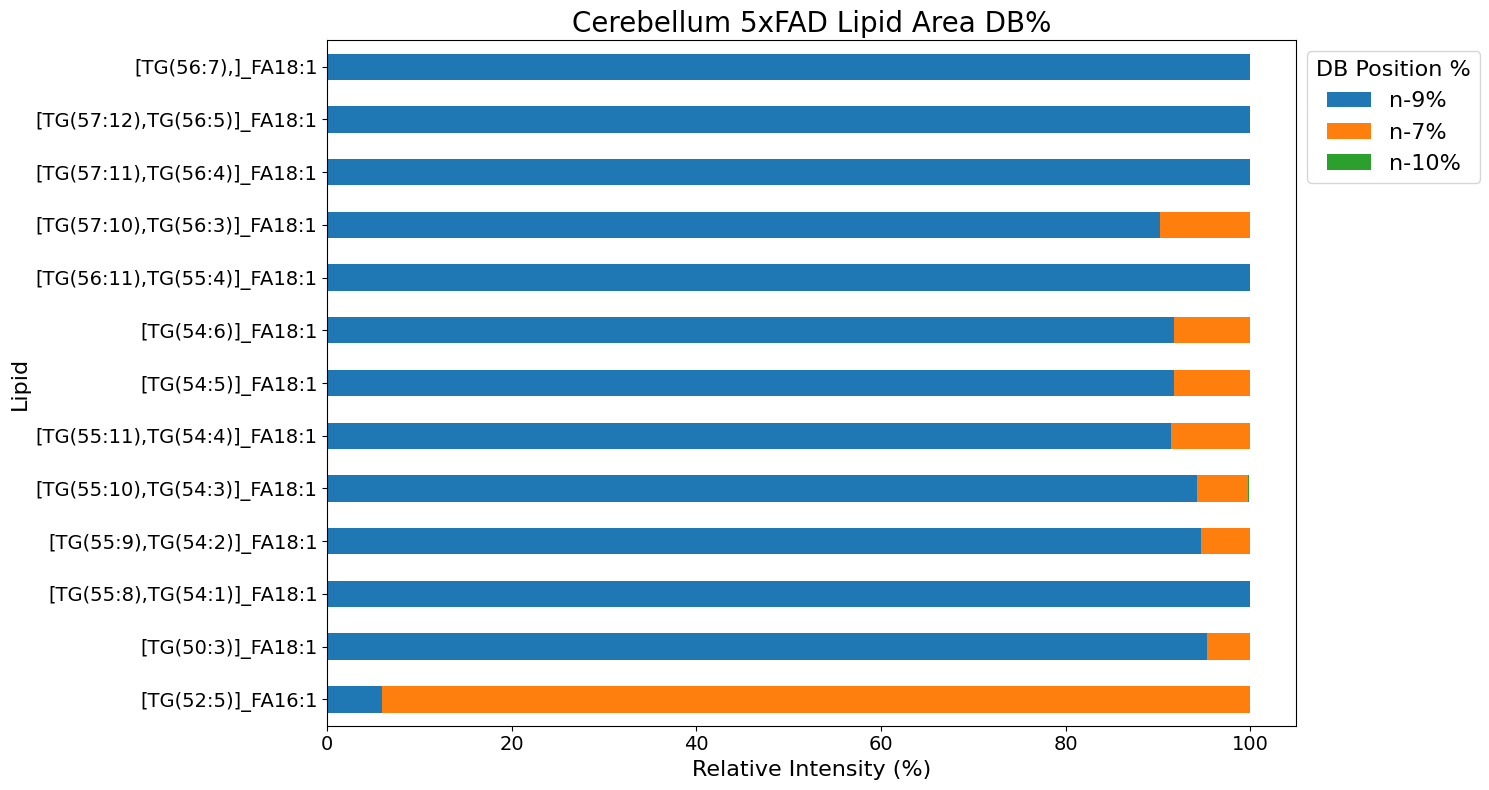

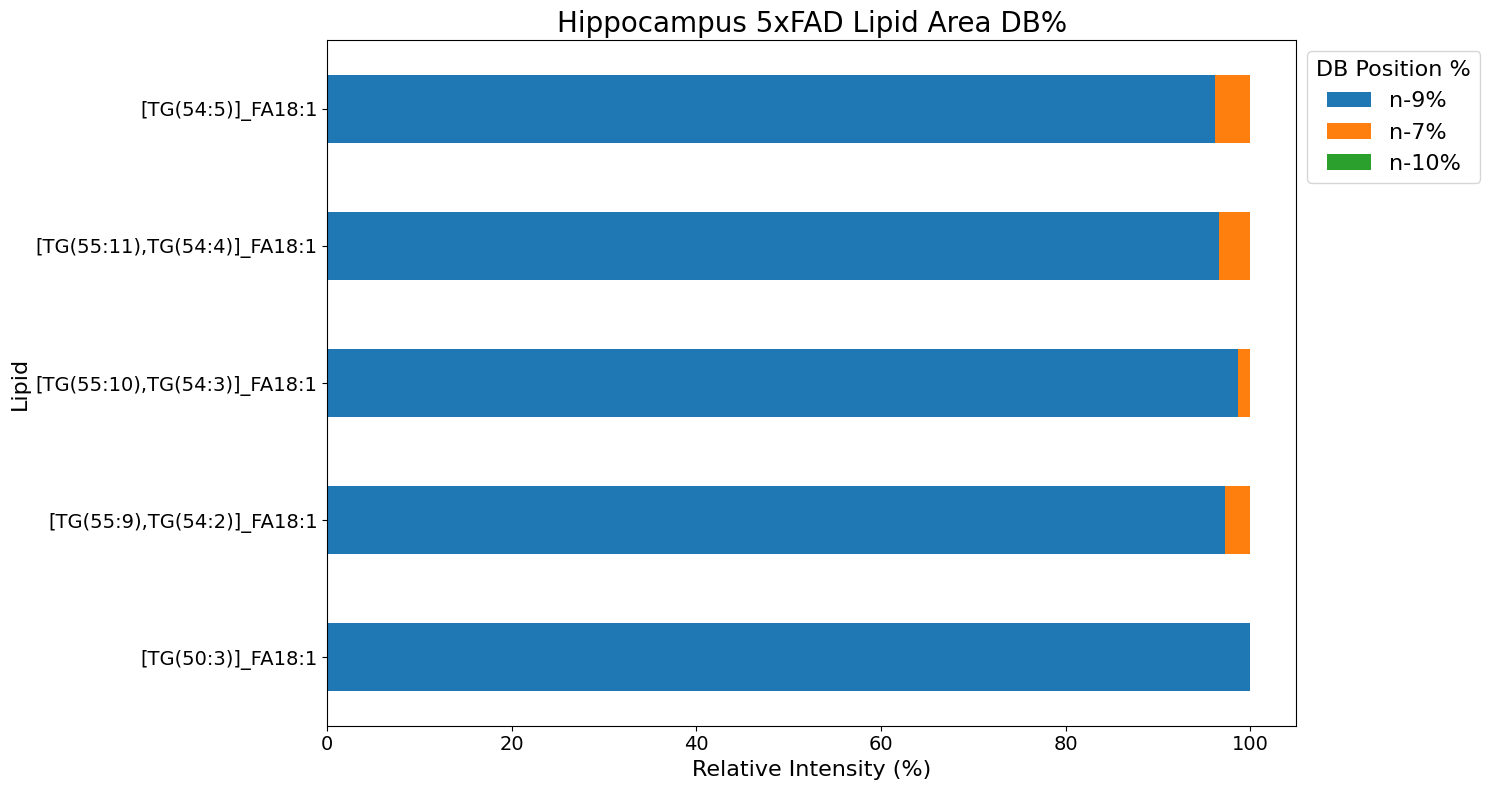

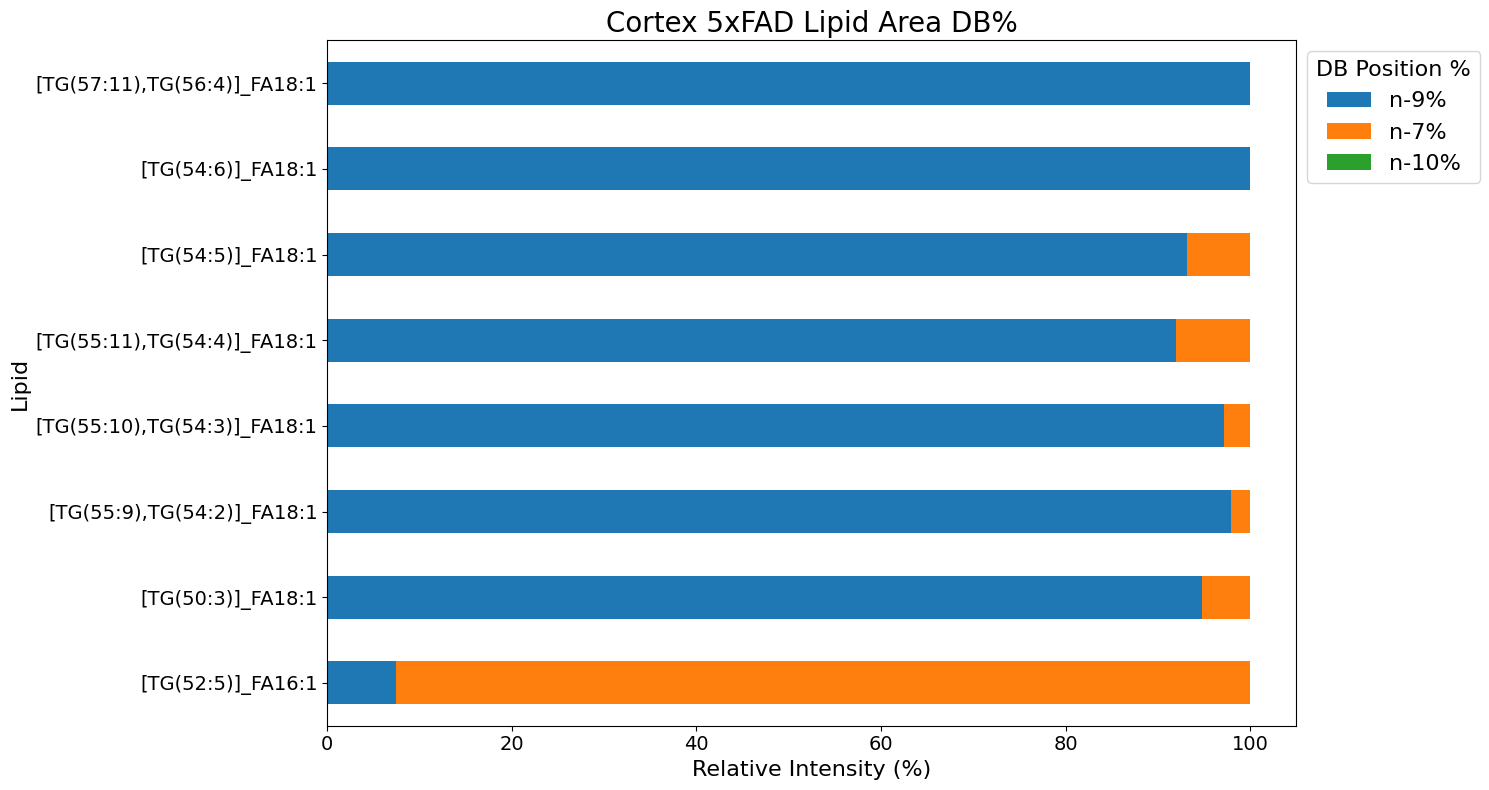

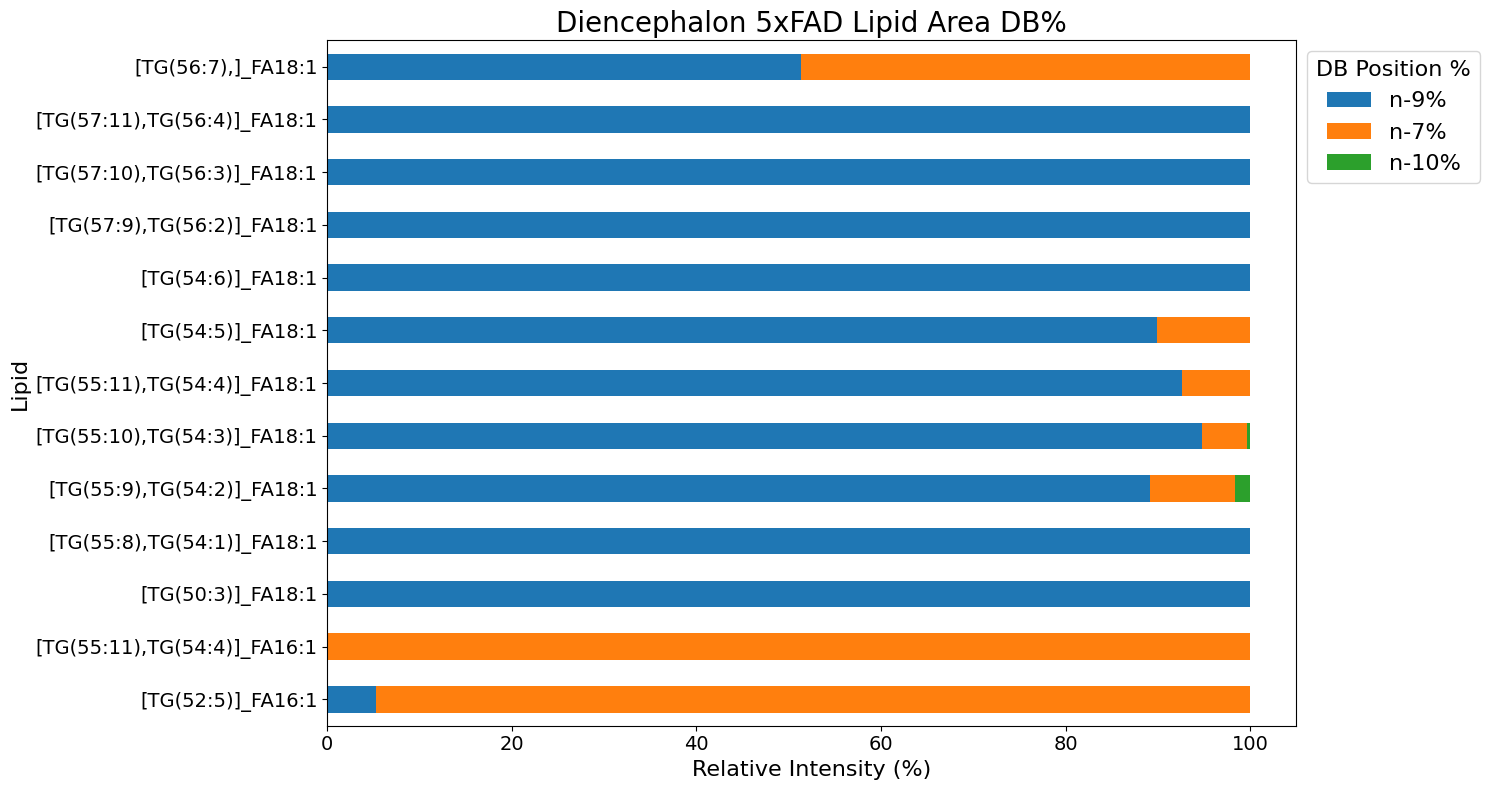

,Lipid,n-7,n-9,n-10,n-12,Total_Intensity,n-7%,n-9%,n-10%,n-12%
0,[TG(50:3)]_FA18:1,0.0,347.0,0.0,0,347.0,0.0,100.0,0.0,0.0
1,[TG(52:5)]_FA16:1,1439.0,81.0,0.0,0,1520.0,94.7,5.3,0.0,0.0
2,[TG(54:5)]_FA18:1,391.0,3491.0,0.0,0,3882.0,10.1,89.9,0.0,0.0
3,[TG(54:6)]_FA18:1,0.0,145.0,0.0,0,145.0,0.0,100.0,0.0,0.0
4,"[TG(55:10),TG(54:3)]_FA18:1",917.0,17911.0,56.0,0,18884.0,4.9,94.8,0.3,0.0
5,"[TG(55:11),TG(54:4)]_FA16:1",179.0,0.0,0.0,0,179.0,100.0,0.0,0.0,0.0
6,"[TG(55:11),TG(54:4)]_FA18:1",1035.0,12877.0,0.0,0,13912.0,7.4,92.6,0.0,0.0
7,"[TG(55:8),TG(54:1)]_FA18:1",0.0,149.0,0.0,0,149.0,0.0,100.0,0.0,0.0
8,"[TG(55:9),TG(54:2)]_FA18:1",323.0,3097.0,56.0,0,3476.0,9.3,89.1,1.6,0.0
9,"[TG(56:7),]_FA18:1",58.0,61.0,0.0,0,119.0,48.7,51.3,0.0,0.0


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import re

def combined_sort_key(lipid):
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))
    return fa16_1_key + tg_list_sorted + lipid

def plot_brain_region_5xFAD(df, region_name):
    # # Calculate percentages
    # for col in ['n-7', 'n-9', 'n-10', 'n-12']:
    #     df[col + '%'] = ((df[col] / df['Total Intensity']) * 100).round(1)

    # Reshape the DataFrame
    reshaped_df = df.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')

    # Create pivot table
    pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%', 'n-10%']]

    # Apply the combined sorting function to the Lipid index to create a sorting key
    pivot_df['Combined_Sort_Key'] = pivot_df.index.to_series().apply(combined_sort_key)

    # Sort the DataFrame by the combined sorting key
    pivot_df = pivot_df.sort_values(by='Combined_Sort_Key')

    # Drop the combined sorting key column
    pivot_df.drop('Combined_Sort_Key', axis=1, inplace=True)

    # Plotting
    pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))
    plt.xlabel('Relative Intensity (%)', fontsize = 16)
    plt.ylabel('Lipid', fontsize = 16)
    plt.title(f'{region_name} 5xFAD Lipid Area DB%', fontsize = 20)
    plt.legend(title='DB Position %', loc='upper left', bbox_to_anchor=(1, 1), fontsize = 16, title_fontsize = 16)
    plt.xticks(fontsize =14)
    plt.yticks(fontsize =14)

    # Saving the plot
    # plt.savefig(f'Projects/FaceFats/plots/Barstack_area/{region_name}_5xFAD_Area_Truth_14Jan24.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'Projects/FaceFats/plots/Barstack_area/{region_name}_5xFAD_Area_Truth_14Jan24.pdf', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()


df_brain_5xFAD_cereb2
df_brain_5xFAD_cortex2
df_brain_5xFAD_hippo2
df_brain_5xFAD_dienc2
# Example usage
plot_brain_region_5xFAD(df_brain_5xFAD_cereb2, 'Cerebellum')
plot_brain_region_5xFAD(df_brain_5xFAD_hippo2, 'Hippocampus')
plot_brain_region_5xFAD(df_brain_5xFAD_cortex2, 'Cortex')
plot_brain_region_5xFAD(df_brain_5xFAD_dienc2, 'Diencephalon')
df_brain_5xFAD_cereb2
df_brain_5xFAD_cortex2
df_brain_5xFAD_hippo2
df_brain_5xFAD_dienc2


# TG(54:2)

In [22]:
# def plot_TG54_2_across_regions(df_list, region_names):
#     # Check if the number of dataframes matches the number of region names
#     if len(df_list) != len(region_names):
#         raise ValueError("The number of dataframes must match the number of region names")

#     # Initialize a list to store filtered and reshaped dataframes
#     reshaped_dfs = []

#     # Process each dataframe
#     for df, region_name in zip(df_list, region_names):
#         # Filter for lipids containing 'TG(54:2)'
#         tg54_2_df = df[df['Lipid'].str.contains('TG\(54:2\)')]

#         # Reshape the DataFrame
#         reshaped_df = tg54_2_df.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name=region_name)

#         # Append to the list
#         reshaped_dfs.append(reshaped_df)

#     # Concatenate all reshaped dataframes
#     combined_df = pd.concat(reshaped_dfs)

#     # Create a pivot table
#     pivot_df = combined_df.pivot_table(index='Lipid', columns='db_pos', values=region_names, aggfunc='sum')

#     # Plotting
#     pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))
#     plt.xlabel('Relative Intensity (%)', fontsize=16)
#     plt.ylabel('Lipid', fontsize=16)
#     plt.title('TG(54:2) Across Different Brain Regions in 5xFAD', fontsize=20)
#     plt.legend(title='DB Position %', loc='upper left', bbox_to_anchor=(1, 1), fontsize=16, title_fontsize=16)
#     plt.xticks(fontsize=14)
#     plt.yticks(fontsize=14)
#     plt.tight_layout()
#     plt.show()

# # Example usage
# df_list = [df_brain_5xFAD_cereb2, df_brain_5xFAD_cortex2, df_brain_5xFAD_hippo2, df_brain_5xFAD_dienc2]
# region_names = ['Cerebellum', 'Cortex', 'Hippocampus', 'Diencephalon']
# plot_TG54_2_across_regions(df_list, region_names)

################ makes a funny stacked plot ################


In [8]:
# def plot_TG54_2_across_regions(df_list, region_names):
#     if len(df_list) != len(region_names):
#         raise ValueError("The number of dataframes must match the number of region names")

#     # Initialize a list to store the reshaped dataframes
#     reshaped_dfs = []

#     # Process each dataframe
#     for df, region_name in zip(df_list, region_names):
#         # Filter for lipids containing 'TG(54:2)'
#         tg54_2_df = df[df['Lipid'].str.contains('TG\(54:2\)')]

#         # Reshape the DataFrame
#         reshaped_df = tg54_2_df.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')

#         # Add a column for the brain region
#         reshaped_df['Brain Region'] = region_name + ' - ' + reshaped_df['Lipid']

#         # Append to the list
#         reshaped_dfs.append(reshaped_df)

#     # Concatenate all reshaped dataframes
#     combined_df = pd.concat(reshaped_dfs)

#     # Create a pivot table and reorder the columns
#     pivot_df = combined_df.pivot_table(index='Brain Region', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%', 'n-10%']]

#     # Define colors for each db_pos
#     colors = {'n-9%': 'blue', 'n-7%': 'orange', 'n-10%': 'green'}

#     # Plotting
#     pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8), color=[colors[col] for col in pivot_df.columns])
#     plt.xlabel('Relative Intensity (%)', fontsize=16)
#     plt.ylabel('Brain Region - Lipid', fontsize=16)
#     plt.title('TG(54:2) Across Different Brain Regions in 5xFAD', fontsize=20)
#     plt.legend(title='DB Position %', loc='upper left', bbox_to_anchor=(1, 1), fontsize=16, title_fontsize=16)
#     plt.xticks(fontsize=14)
#     plt.yticks(fontsize=14)
#     plt.tight_layout()
#     plt.show()

# # Example usage
# df_list = [df_brain_5xFAD_cereb2, df_brain_5xFAD_cortex2, df_brain_5xFAD_hippo2, df_brain_5xFAD_dienc2]
# region_names = ['Cerebellum', 'Cortex', 'Hippocampus', 'Diencephalon']
# plot_TG54_2_across_regions(df_list, region_names)


In [9]:
# def plot_brain_region_5xFAD_TG54_2(df, region_name):
#     # Filter for lipids containing 'TG(54:2)'
#     tg54_2_df = df[df['Lipid'].str.contains('TG\(54:2\)')]

#     # Reshape the DataFrame
#     reshaped_df = tg54_2_df.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')

#     # Create pivot table
#     pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%', 'n-10%']]

#     # Apply the combined sorting function to the Lipid index to create a sorting key
#     pivot_df['Combined_Sort_Key'] = pivot_df.index.to_series().apply(combined_sort_key)

#     # Sort the DataFrame by the combined sorting key
#     pivot_df = pivot_df.sort_values(by='Combined_Sort_Key')

#     # Drop the combined sorting key column
#     pivot_df.drop('Combined_Sort_Key', axis=1, inplace=True)

#     # Plotting
#     pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))
#     plt.xlabel('Relative Intensity (%)', fontsize=16)
#     plt.ylabel('Lipid', fontsize=16)
#     plt.title(f'{region_name} 5xFAD TG(54:2) Lipid Area DB%', fontsize=20)
#     plt.legend(title='DB Position %', loc='upper left', bbox_to_anchor=(1, 1), fontsize=16, title_fontsize=16)
#     plt.xticks(fontsize=14)
#     plt.yticks(fontsize=14)
#     plt.tight_layout()
#     plt.show()

# # Example usage
# plot_brain_region_5xFAD_TG54_2(df_brain_5xFAD_cereb2, 'Cerebellum')
# plot_brain_region_5xFAD_TG54_2(df_brain_5xFAD_hippo2, 'Hippocampus')
# plot_brain_region_5xFAD_TG54_2(df_brain_5xFAD_cortex2, 'Cortex')
# plot_brain_region_5xFAD_TG54_2(df_brain_5xFAD_dienc2, 'Diencephalon')


In [10]:
# def plot_TG54_2_all_regions(df_list, region_names):
#     if len(df_list) != len(region_names):
#         raise ValueError("The number of dataframes must match the number of region names")

#     # Initialize a list to store the reshaped dataframes
#     reshaped_dfs = []

#     # Process each dataframe
#     for df, region_name in zip(df_list, region_names):
#         # Filter for lipids containing 'TG(54:2)'
#         tg54_2_df = df[df['Lipid'].str.contains('TG\(54:2\)')]

#         # Reshape the DataFrame
#         reshaped_df = tg54_2_df.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')

#         # Add a column for the brain region
#         reshaped_df['Brain Region'] = region_name + ' - TG(54:2)'

#         # Append to the list
#         reshaped_dfs.append(reshaped_df)

#     # Concatenate all reshaped dataframes
#     combined_df = pd.concat(reshaped_dfs)

#     # Create a pivot table
#     pivot_df = combined_df.pivot_table(index='Brain Region', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%', 'n-10%']]

#     # Plotting
#     pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))
#     plt.xlabel('Relative Intensity (%)', fontsize=16)
#     plt.ylabel('Brain Region - Lipid', fontsize=16)
#     plt.title('TG(54:2) Across Different Brain Regions in 5xFAD', fontsize=20)
#     plt.legend(title='DB Position %', loc='upper left', bbox_to_anchor=(1, 1), fontsize=16, title_fontsize=16)
#     plt.xticks(fontsize=14)
#     plt.yticks(fontsize=14)
#     plt.tight_layout()
#     plt.show()

# # Example usage
# df_list = [df_brain_5xFAD_cereb2, df_brain_5xFAD_hippo2, df_brain_5xFAD_cortex2, df_brain_5xFAD_dienc2]
# region_names = ['Cortex', 'Hippocampus', 'Cerebellum', 'Diencephalon']
# plot_TG54_2_all_regions(df_list, region_names)
# df_list

# 5xFAD TG54:2

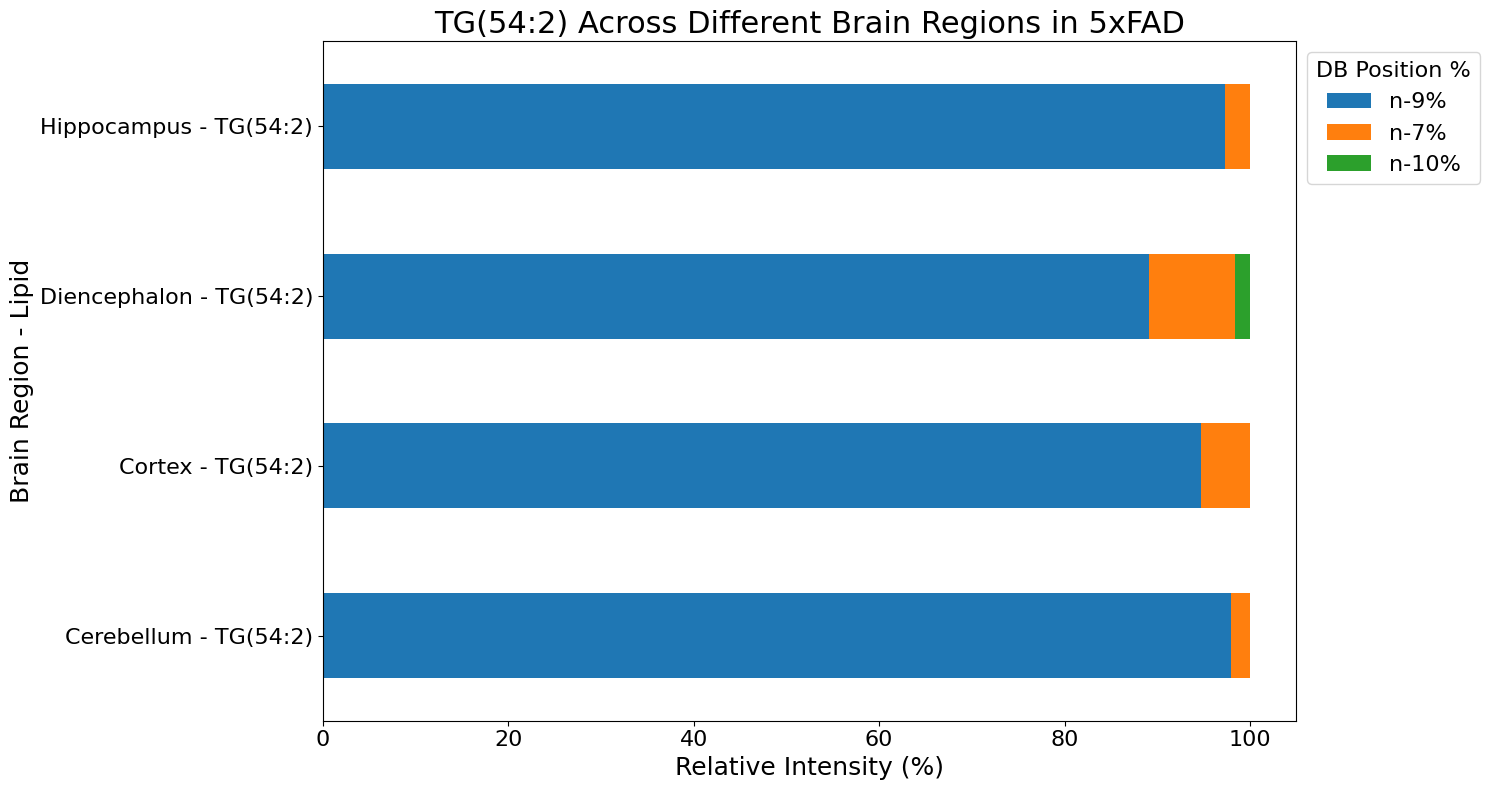

In [11]:
def plot_TG54_2_all_regions(df_list, region_names):
    if len(df_list) != len(region_names):
        raise ValueError("The number of dataframes must match the number of region names")

    # Initialize a list to store the reshaped dataframes
    reshaped_dfs = []

    # Process each dataframe
    for df, region_name in zip(df_list, region_names):
        # Filter for lipids containing 'TG(54:2)'
        tg54_2_df = df[df['Lipid'].str.contains('TG\(54:2\)')]

        # Reshape the DataFrame
        reshaped_df = tg54_2_df.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')

        # Add a column for the brain region
        reshaped_df['Brain Region'] = region_name + ' - TG(54:2)'

        # Append to the list
        reshaped_dfs.append(reshaped_df)

    # Concatenate all reshaped dataframes
    combined_df = pd.concat(reshaped_dfs)

    # Create a pivot table
    pivot_df = combined_df.pivot_table(index='Brain Region', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%', 'n-10%']]

    # Plotting
    pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))
    
    # Set font sizes
    label_fontsize = 18  # Font size for labels
    title_fontsize = 22  # Font size for title
    legend_fontsize = 16  # Font size for legend
    tick_fontsize = 16  # Font size for axis ticks

    plt.xlabel('Relative Intensity (%)', fontsize=label_fontsize)
    plt.ylabel('Brain Region - Lipid', fontsize=label_fontsize)
    plt.title('TG(54:2) Across Different Brain Regions in 5xFAD', fontsize=title_fontsize)
    plt.legend(title='DB Position %', loc='upper left', bbox_to_anchor=(1, 1), fontsize=legend_fontsize, title_fontsize=legend_fontsize)
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    plt.tight_layout()
    #save figure as pdf
    plt.savefig('FaceFats_Stackedbarplot_TG54-2.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
df_list = [df_brain_5xFAD_cereb2, df_brain_5xFAD_hippo2, df_brain_5xFAD_cortex2, df_brain_5xFAD_dienc2]
region_names = ['Cortex', 'Hippocampus', 'Cerebellum', 'Diencephalon']
plot_TG54_2_all_regions(df_list, region_names)



In [12]:
import pandas as pd

# Assuming df_list is your list of DataFrames
df_list = [df_brain_5xFAD_cereb2, df_brain_5xFAD_hippo2, df_brain_5xFAD_cortex2, df_brain_5xFAD_dienc2]
sheet_names = ['Cerebellum', 'Hippocampus', 'Cortex', 'Diencephalon']  # Sheet names for each DataFrame

# Create a Pandas Excel writer using XlsxWriter as the engine
excel_file_path = 'Brain_Region_List.xlsx'  # Specify your desired file path and name
writer = pd.ExcelWriter(excel_file_path, engine='openpyxl')

# Write each DataFrame to a different worksheet
for df, sheet_name in zip(df_list, sheet_names):
    df.to_excel(writer, sheet_name=sheet_name, index=False)

# Save the Excel file
writer.save()


# WT TG(54:2)

In [13]:
#use d18 or dload

# # Filtering for WT Genotype
df_WT = df_wt[df_wt['Genotype'] == 'WT']
# df_WT = d_load[d_load['Genotype'] == 'WT']

# Step 1: Filter for non-liver samples and rename to df_brain_WT
df_brain_WT = df_WT[df_WT['Biology'] != 'liver']

# Step 1: Filter for non-liver samples and rename to df_brain_WT
df_brain_WT = df_WT[df_WT['Biology'] != 'liver']
df_brain_WT_cereb = df_brain_WT[df_brain_WT['Biology'] == 'cereb']
df_brain_WT_cortex = df_brain_WT[df_brain_WT['Biology'] == 'cortex']
df_brain_WT_hippo = df_brain_WT[df_brain_WT['Biology'] == 'hippo']
df_brain_WT_dienc = df_brain_WT[df_brain_WT['Biology'] == 'dienc']

def process_n_percent(df):
    # Create and fill n-7, n-9, n-10, n-12 columns
    for col in ['n-7', 'n-9', 'n-10', 'n-12']:
        df[col] = df.apply(lambda x: x['Area'] if x['db'] == col else 0, axis=1)

    # Group by 'Lipid' and sum up the n columns
    df_grouped = df.groupby('Lipid')[['n-7', 'n-9', 'n-10', 'n-12']].sum().round(0).reset_index()

    # Calculate total intensity
    df_grouped['Total_Intensity'] = df_grouped[['n-7', 'n-9', 'n-10', 'n-12']].sum(axis=1)

    # Calculate relative intensities
    for col in ['n-7', 'n-9', 'n-10', 'n-12']:
        df_grouped[col + '%'] = ((df_grouped[col] / df_grouped['Total_Intensity']) * 100).round(1)

    # Return the new dataframe
    return df_grouped

#Example usage:
df_brain_WT2 = process_n_percent(df_brain_WT)
df_brain_WT_cereb2 = process_n_percent(df_brain_WT_cereb)
df_brain_WT_cortex2 = process_n_percent(df_brain_WT_cortex)
df_brain_WT_hippo2 = process_n_percent(df_brain_WT_hippo)
df_brain_WT_dienc2 = process_n_percent(df_brain_WT_dienc)



# Display the final DataFrame df_brain_WT2
df_brain_WT2
df_brain_WT_cereb2
df_brain_WT_cortex2
df_brain_WT_hippo2
df_brain_WT_dienc2


/tmp/ipykernel_119793/1485882254.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df.apply(lambda x: x['Area'] if x['db'] == col else 0, axis=1)


,Lipid,n-7,n-9,n-10,n-12,Total_Intensity,n-7%,n-9%,n-10%,n-12%
0,[TG(50:3)]_FA18:1,0.0,116.0,0,0,116.0,0.0,100.0,0.0,0.0
1,[TG(54:5)]_FA18:1,61.0,400.0,0,0,461.0,13.2,86.8,0.0,0.0
2,"[TG(55:10),TG(54:3)]_FA18:1",538.0,12435.0,0,0,12973.0,4.1,95.9,0.0,0.0
3,"[TG(55:11),TG(54:4)]_FA18:1",436.0,5151.0,0,0,5587.0,7.8,92.2,0.0,0.0
4,"[TG(55:9),TG(54:2)]_FA18:1",256.0,2940.0,0,0,3196.0,8.0,92.0,0.0,0.0


In [14]:
# Grouping by 'Lipid' and summing up the n-7, n-9, n-10, and n-12 columns
df_brain_WT2 = df_brain_WT.groupby('Lipid')[['n-7', 'n-9', 'n-10', 'n-12']].sum().round(0).reset_index()
#Creating a new column 'Total Intensity' in df_brain_WT2
df_brain_WT2['Total_Intensity'] = df_brain_WT2[['n-7', 'n-9', 'n-10', 'n-12']].sum(axis=1)

# Create the 'FA' column
df_brain_WT2['FA'] = df_brain_WT2['Lipid'].apply(lambda x: '16' if 'FA16:1' in x else ('18' if 'FA18:1' in x else 'Other'))

# Sort the DataFrame by the 'FA' column
df_brain_WT2.sort_values(by='FA', inplace=True)
#reset index
df_brain_WT2.reset_index(drop=True, inplace=True)
# Displaying df4
df_brain_WT2

,Lipid,n-7,n-9,n-10,n-12,Total_Intensity,FA
0,[TG(52:5)]_FA16:1,5052.0,557.0,0.0,0,5609.0,16
1,"[TG(55:11),TG(54:4)]_FA16:1",120.0,0.0,0.0,0,120.0,16
2,[TG(50:3)]_FA18:1,163.0,2485.0,0.0,0,2648.0,18
3,[TG(54:5)]_FA18:1,1156.0,6407.0,0.0,0,7563.0,18
4,[TG(54:6)]_FA18:1,0.0,475.0,0.0,0,475.0,18
5,"[TG(55:10),TG(54:3)]_FA18:1",4806.0,71713.0,0.0,0,76519.0,18
6,"[TG(55:11),TG(54:4)]_FA18:1",4204.0,36437.0,0.0,0,40641.0,18
7,"[TG(55:8),TG(54:1)]_FA18:1",0.0,313.0,0.0,0,313.0,18
8,"[TG(55:9),TG(54:2)]_FA18:1",1107.0,13937.0,165.0,0,15209.0,18
9,"[TG(56:7),]_FA18:1",50.0,48.0,0.0,0,98.0,18


In [15]:
# Creating a new dataframe df_brain_WT3 from df_liver2
df_brain_WT3 = df_brain_WT2.copy()

# Calculating the relative intensity of each db_pos for each lipid
for col in ['n-7', 'n-9', 'n-10', 'n-12']:
    df_brain_WT3[col + '%'] = ((df_brain_WT3[col] / df_brain_WT3['Total_Intensity']) * 100).round(1)


# Function to determine the value for the FAC column
def determine_fac(lipid):
    if 'FA18:1' in lipid:
        return 'FA18:1'
    elif 'FA16:1' in lipid:
        return 'FA16:1'
    else:
        return None  # or some other default value

# Apply the function to the Lipid column to create the FAC column
df_brain_WT3['FAC'] = df_brain_WT3['Lipid'].apply(determine_fac)

import pandas as pd
import re

# Function to extract TG values
def extract_tg(lipid):
    # Regular expression pattern to match TG(##:#) or similar patterns
    pattern = r'TG\(\d+:\d+\)'
    matches = re.findall(pattern, lipid)
    return ', '.join(matches) if matches else None

# Apply the function to the Lipid column to create the TG column
df_brain_WT3['TG'] = df_brain_WT3['Lipid'].apply(extract_tg)




# Function to sort TG values within a cell
def sort_tg_values(tg_cell):
    if not pd.isna(tg_cell) and ', ' in tg_cell:
        tg_list = tg_cell.split(', ')
        tg_list_sorted = sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')])
        return ', '.join(tg_list_sorted)
    else:
        return tg_cell

# Apply the function to the TG column
df_brain_WT3['TG'] = df_brain_WT3['TG'].apply(sort_tg_values)
df_brain_WT3 = df_brain_WT3.sort_values(by=['FAC', 'TG'])
import pandas as pd
import re

# Function to remove TG(##:0) patterns from the Lipid string
def remove_tg_zero(lipid):
    # Pattern to match TG(##:0)
    pattern = r'TG\(\d+:0\)'
    # Remove TG(##:0) patterns
    new_lipid = re.sub(pattern, '', lipid)
    # Remove any extra commas and spaces left after removal
    new_lipid = re.sub(r',\s+', ', ', new_lipid).strip(', ')
    return new_lipid

# Apply the function to the Lipid column
df_brain_WT3['Lipid'] = df_brain_WT3['Lipid'].apply(remove_tg_zero)

# Continue with the rest of your code for sorting
# ... [rest of your code] ...

# Displaying df_l


# Displaying df_brain_WT3 with the new relative intensity columns
df_brain_WT3


,Lipid,n-7,n-9,n-10,n-12,Total_Intensity,FA,n-7%,n-9%,n-10%,n-12%,FAC,TG
0,[TG(52:5)]_FA16:1,5052.0,557.0,0.0,0,5609.0,16,90.1,9.9,0.0,0.0,FA16:1,TG(52:5)
1,"[TG(55:11),TG(54:4)]_FA16:1",120.0,0.0,0.0,0,120.0,16,100.0,0.0,0.0,0.0,FA16:1,"TG(54:4), TG(55:11)"
2,[TG(50:3)]_FA18:1,163.0,2485.0,0.0,0,2648.0,18,6.2,93.8,0.0,0.0,FA18:1,TG(50:3)
7,"[TG(55:8),TG(54:1)]_FA18:1",0.0,313.0,0.0,0,313.0,18,0.0,100.0,0.0,0.0,FA18:1,"TG(54:1), TG(55:8)"
8,"[TG(55:9),TG(54:2)]_FA18:1",1107.0,13937.0,165.0,0,15209.0,18,7.3,91.6,1.1,0.0,FA18:1,"TG(54:2), TG(55:9)"
5,"[TG(55:10),TG(54:3)]_FA18:1",4806.0,71713.0,0.0,0,76519.0,18,6.3,93.7,0.0,0.0,FA18:1,"TG(54:3), TG(55:10)"
6,"[TG(55:11),TG(54:4)]_FA18:1",4204.0,36437.0,0.0,0,40641.0,18,10.3,89.7,0.0,0.0,FA18:1,"TG(54:4), TG(55:11)"
3,[TG(54:5)]_FA18:1,1156.0,6407.0,0.0,0,7563.0,18,15.3,84.7,0.0,0.0,FA18:1,TG(54:5)
4,[TG(54:6)]_FA18:1,0.0,475.0,0.0,0,475.0,18,0.0,100.0,0.0,0.0,FA18:1,TG(54:6)
12,"[TG(57:9),TG(56:2)]_FA18:1",0.0,231.0,0.0,0,231.0,18,0.0,100.0,0.0,0.0,FA18:1,"TG(56:2), TG(57:9)"


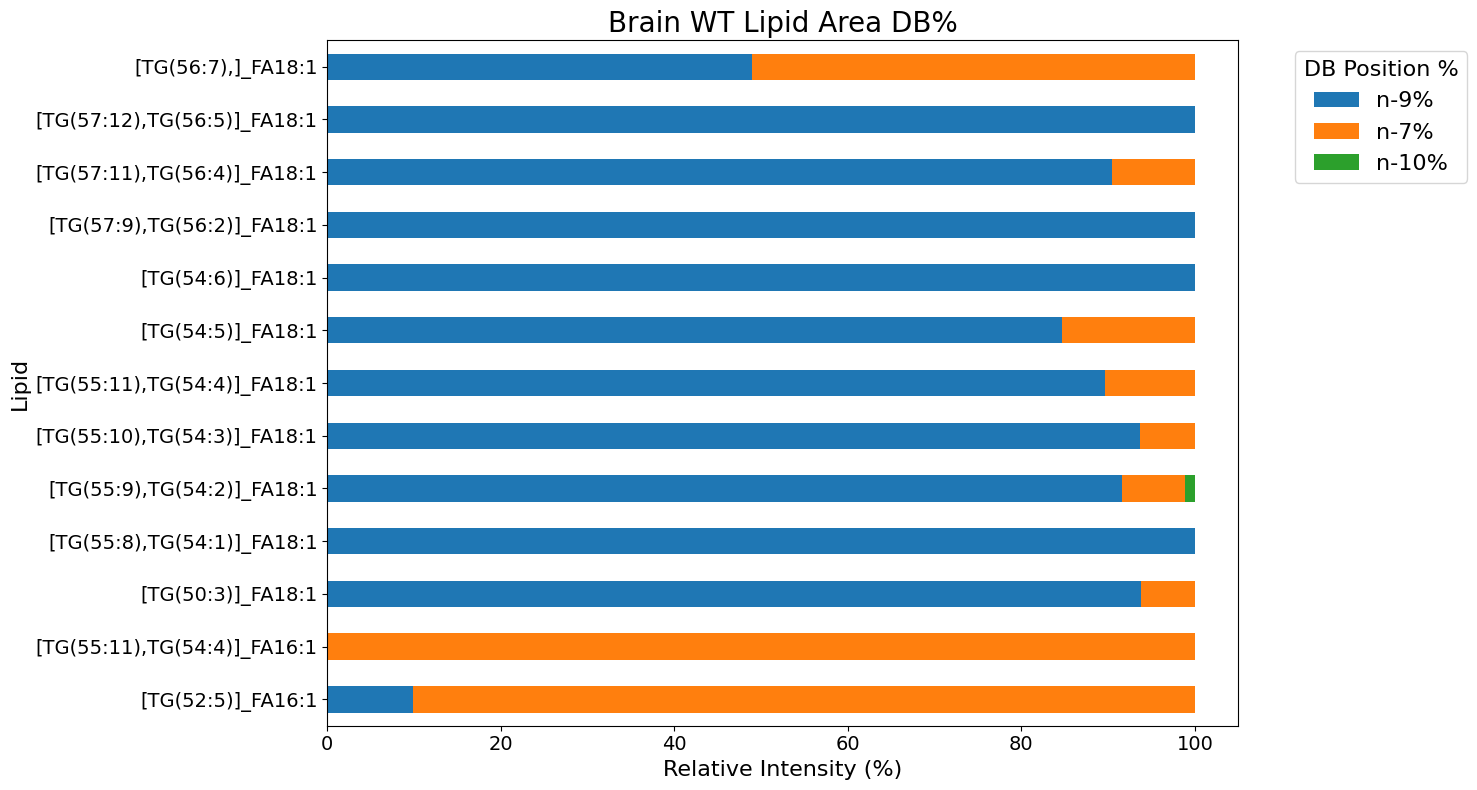

In [16]:
# Reshaping the DataFrame
reshaped_df = df_brain_WT3.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db', value_name='Percentage')


# reshaped_df = reshaped_df[~reshaped_df['Lipid'].str.contains('FA18:2')]

reshaped_df


# Creating a pivot table
pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db', values='Percentage', aggfunc='sum')


# Function to generate a combined sorting key
def combined_sort_key(lipid):
    # Check if lipid contains 'FA16:1'
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

    # Extract and sort TG values
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

    # Combine the keys
    return fa16_1_key + tg_list_sorted + lipid

# Apply the combined sorting function to the Lipid index to create a sorting key
pivot_df['Combined_Sort_Key'] = pivot_df.index.to_series().apply(combined_sort_key)


# Sort the DataFrame by the combined sorting key
pivot_df = pivot_df.sort_values(by='Combined_Sort_Key')

# Drop the combined sorting key column
pivot_df.drop('Combined_Sort_Key', axis=1, inplace=True)

# Reordering the columns to make n-9% appear first
column_order = ['n-9%', 'n-7%', 'n-10%']
# column_order = ['n-9%', 'n-7%', 'n-10%']
pivot_df = pivot_df[column_order]
#delete FA18:2

pivot_df
# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
pivot_df.plot(kind='barh', stacked=True, ax=ax)

ax.set_xlabel('Relative Intensity (%)', fontsize = 16)
ax.set_ylabel('Lipid', fontsize = 16)
ax.set_title('Brain WT Lipid Area DB%', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Moving the legend outside of the plot
ax.legend(title='DB Position %', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 16, title_fontsize = 16)

# # Saving the plot as a PNG file
# plt.savefig('Projects/FaceFats/plots/Barstack_area/FF_BrainWT_Truth_14Jan24.png', dpi=300, bbox_inches='tight')
# #save as pdf
# plt.savefig('Projects/FaceFats/plots/Barstack_area/FF_BrainWT_Truth_14Jan24.pdf', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


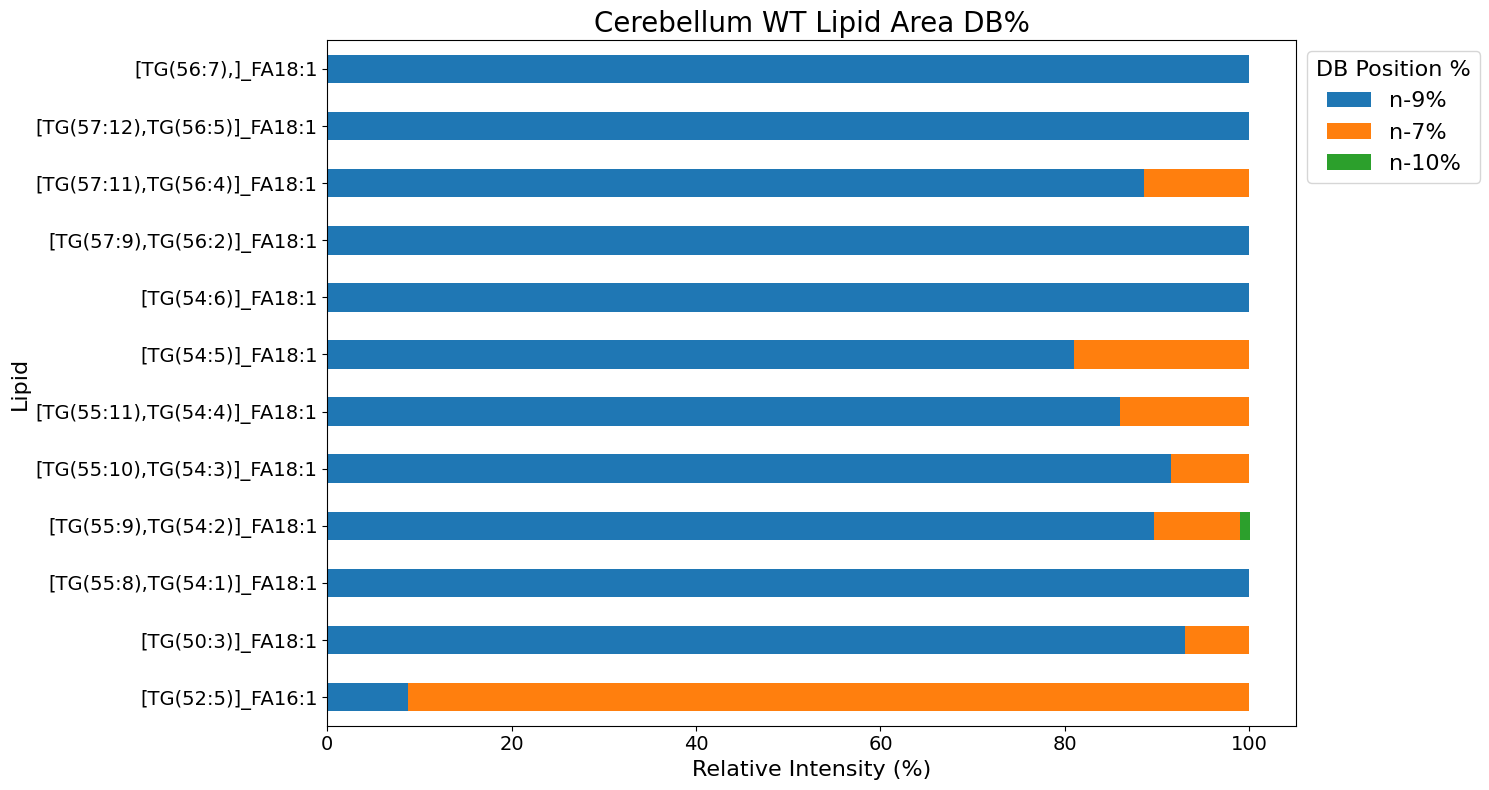

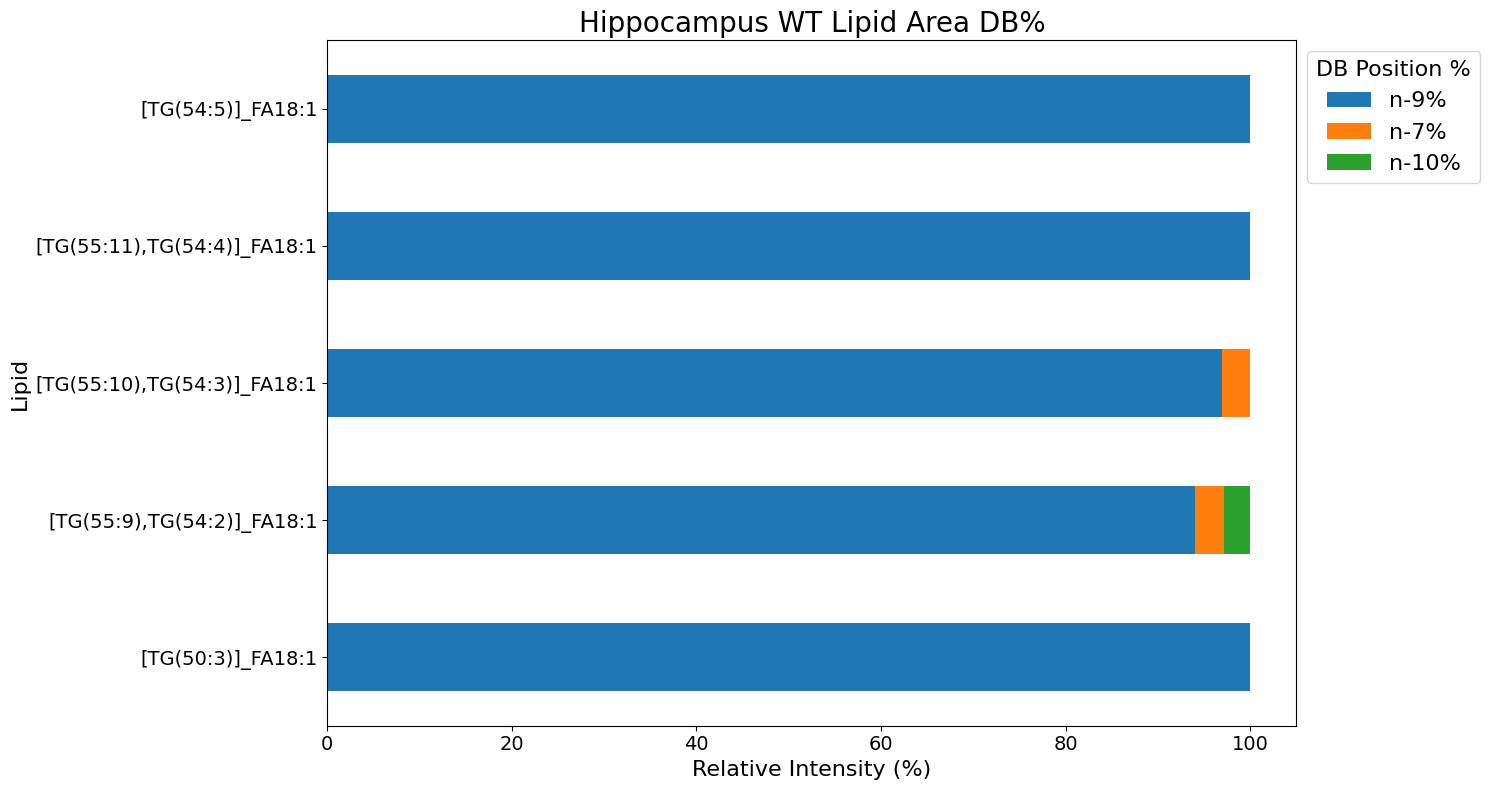

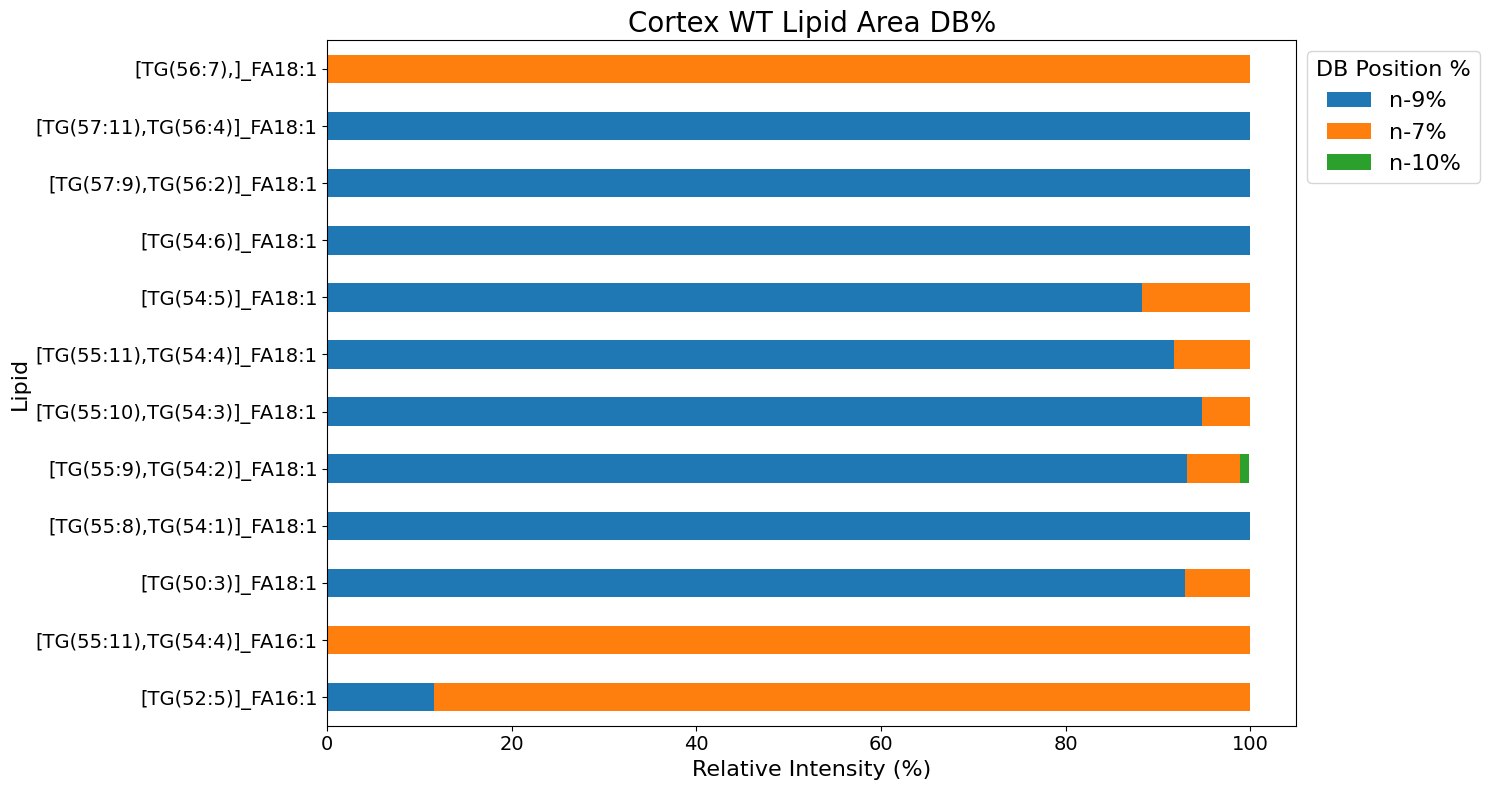

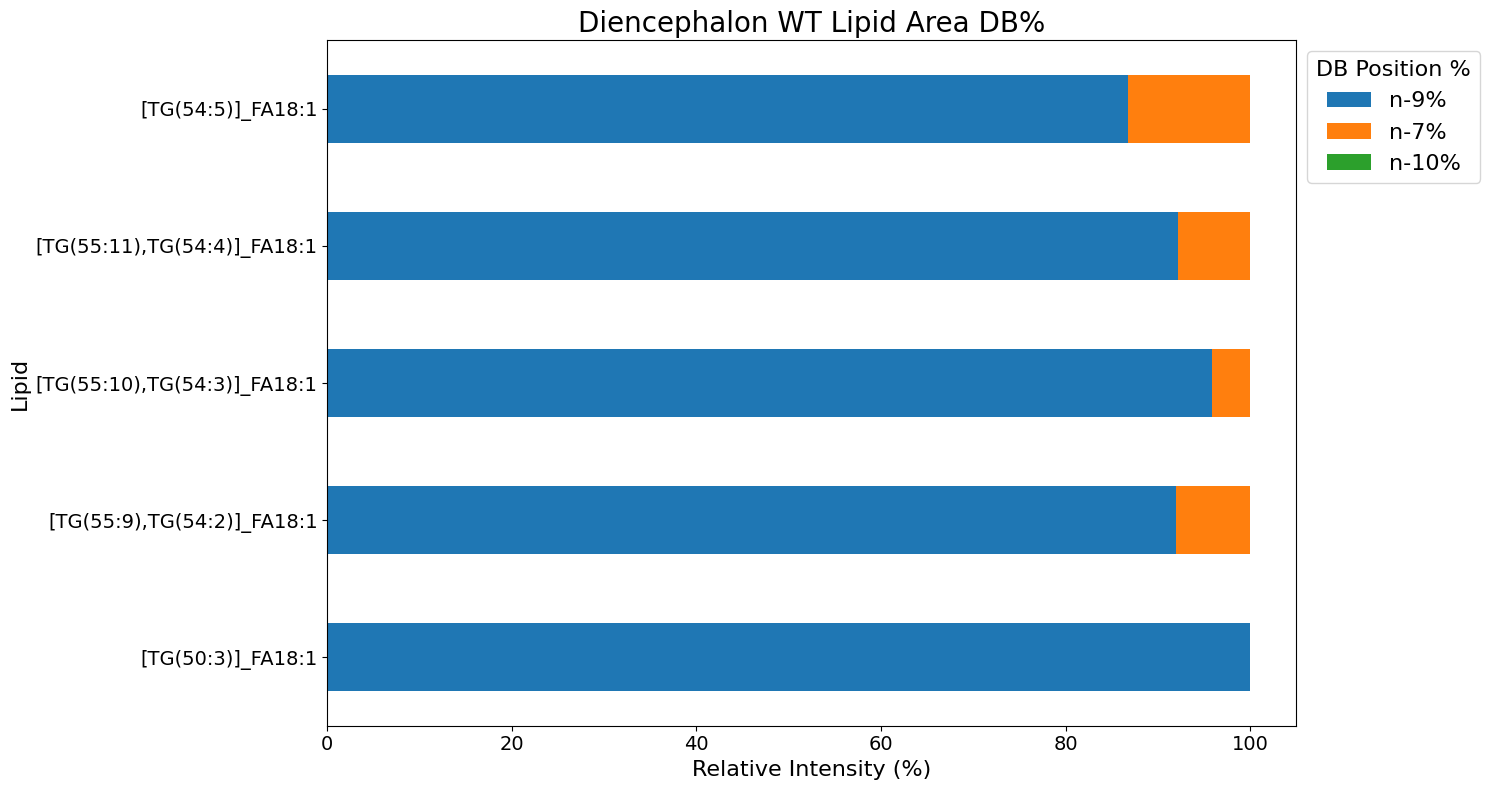

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import re

def combined_sort_key(lipid):
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))
    return fa16_1_key + tg_list_sorted + lipid

def plot_brain_region_WT(df, region_name):
    # # Calculate percentages
    # for col in ['n-7', 'n-9', 'n-10', 'n-12']:
    #     df[col + '%'] = ((df[col] / df['Total Intensity']) * 100).round(1)

    # Reshape the DataFrame
    reshaped_df = df.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')

    # Create pivot table
    pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%', 'n-10%']]

    # Apply the combined sorting function to the Lipid index to create a sorting key
    pivot_df['Combined_Sort_Key'] = pivot_df.index.to_series().apply(combined_sort_key)

    # Sort the DataFrame by the combined sorting key
    pivot_df = pivot_df.sort_values(by='Combined_Sort_Key')

    # Drop the combined sorting key column
    pivot_df.drop('Combined_Sort_Key', axis=1, inplace=True)

    # Plotting
    pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))
    plt.xlabel('Relative Intensity (%)', fontsize = 16)
    plt.ylabel('Lipid', fontsize = 16)
    plt.title(f'{region_name} WT Lipid Area DB%', fontsize = 20)
    plt.legend(title='DB Position %', loc='upper left', bbox_to_anchor=(1, 1), fontsize = 16, title_fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)

    # # # Saving the plot
    # plt.savefig(f'Projects/FaceFats/plots/Barstack_area/{region_name}_WT_Truth_14Jan24.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'Projects/FaceFats/plots/Barstack_area/{region_name}_WT_Truth_14Jan24.pdf', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()


df_brain_WT_cereb2
df_brain_WT_cortex2
df_brain_WT_hippo2
df_brain_WT_dienc2
# Example usage
plot_brain_region_WT(df_brain_WT_cereb2, 'Cerebellum')
plot_brain_region_WT(df_brain_WT_hippo2, 'Hippocampus')
plot_brain_region_WT(df_brain_WT_cortex2, 'Cortex')
plot_brain_region_WT(df_brain_WT_dienc2, 'Diencephalon')


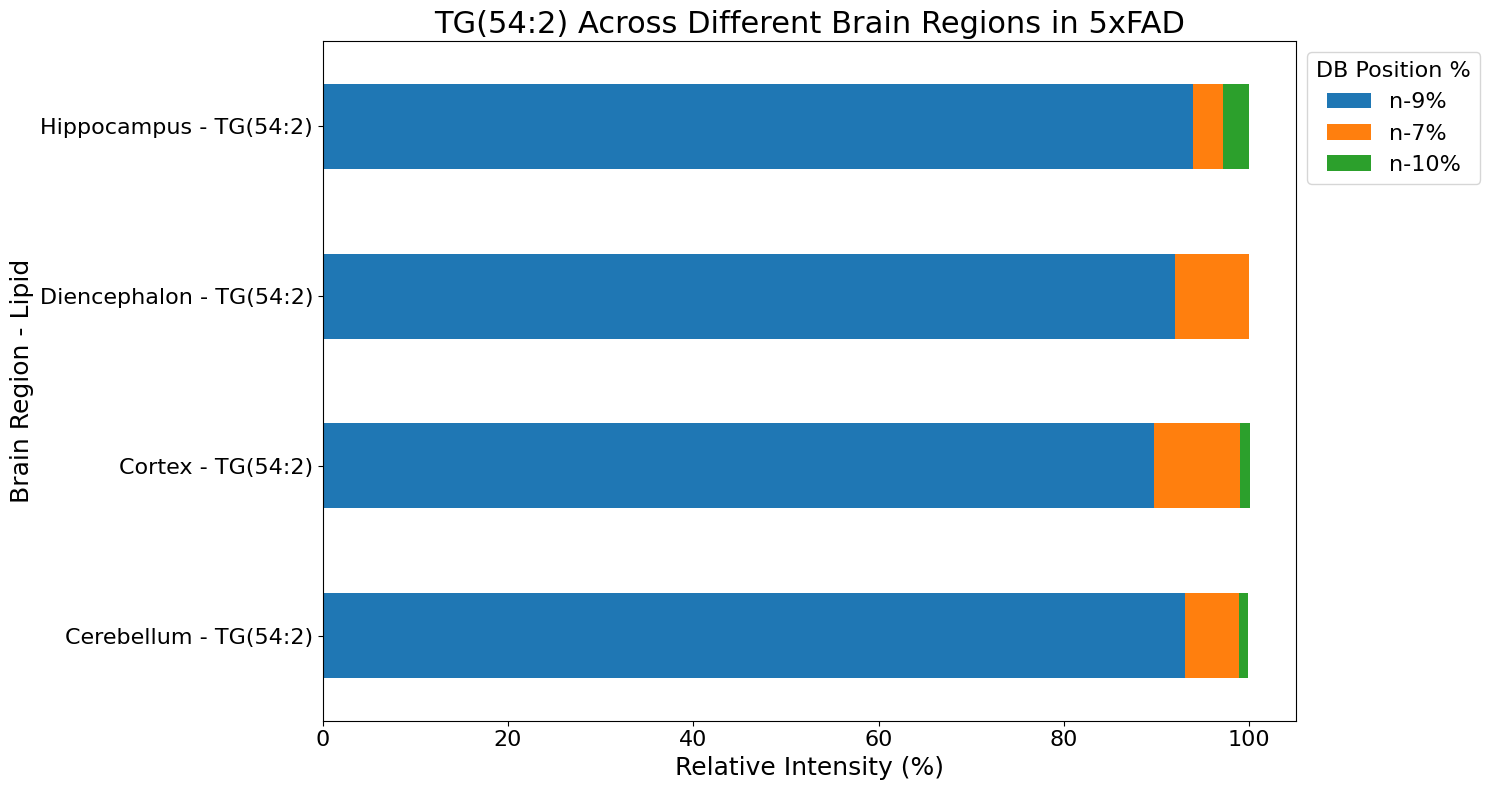

In [19]:
def plot_TG54_2_all_regions(df_list, region_names):
    if len(df_list) != len(region_names):
        raise ValueError("The number of dataframes must match the number of region names")

    # Initialize a list to store the reshaped dataframes
    reshaped_dfs = []

    # Process each dataframe
    for df, region_name in zip(df_list, region_names):
        # Filter for lipids containing 'TG(54:2)'
        tg54_2_df = df[df['Lipid'].str.contains('TG\(54:2\)')]

        # Reshape the DataFrame
        reshaped_df = tg54_2_df.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')

        # Add a column for the brain region
        reshaped_df['Brain Region'] = region_name + ' - TG(54:2)'

        # Append to the list
        reshaped_dfs.append(reshaped_df)

    # Concatenate all reshaped dataframes
    combined_df = pd.concat(reshaped_dfs)

    # Create a pivot table
    pivot_df = combined_df.pivot_table(index='Brain Region', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%', 'n-10%']]

    # Plotting
    pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))
    
    # Set font sizes
    label_fontsize = 18  # Font size for labels
    title_fontsize = 22  # Font size for title
    legend_fontsize = 16  # Font size for legend
    tick_fontsize = 16  # Font size for axis ticks

    plt.xlabel('Relative Intensity (%)', fontsize=label_fontsize)
    plt.ylabel('Brain Region - Lipid', fontsize=label_fontsize)
    plt.title('TG(54:2) Across Different Brain Regions in 5xFAD', fontsize=title_fontsize)
    plt.legend(title='DB Position %', loc='upper left', bbox_to_anchor=(1, 1), fontsize=legend_fontsize, title_fontsize=legend_fontsize)
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    plt.tight_layout()
    #save figure as pdf
    plt.savefig('FaceFats_Stackedbarplot_TG54-2_WT.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
df_list = [df_brain_WT_cereb2, df_brain_WT_hippo2, df_brain_WT_cortex2, df_brain_WT_dienc2]
region_names = ['Cortex', 'Hippocampus', 'Cerebellum', 'Diencephalon']
plot_TG54_2_all_regions(df_list, region_names)
#print the list df_list to excel file


In [20]:
import pandas as pd

# Assuming df_list is your list of DataFrames
df_list = [df_brain_WT_cereb2, df_brain_WT_hippo2, df_brain_WT_cortex2, df_brain_WT_dienc2]
sheet_names = ['Cerebellum', 'Hippocampus', 'Cortex', 'Diencephalon']  # Sheet names for each DataFrame

# Create a Pandas Excel writer using XlsxWriter as the engine
excel_file_path = 'Brain_Region_TG542_WT.xlsx'  # Specify your desired file path and name
writer = pd.ExcelWriter(excel_file_path, engine='openpyxl')

# Write each DataFrame to a different worksheet
for df, sheet_name in zip(df_list, sheet_names):
    df.to_excel(writer, sheet_name=sheet_name, index=False)

# Save the Excel file
writer.save()
